In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import numpy as np
from glob import glob

tf.enable_eager_execution()

In [2]:
def _parse_function(filename):
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string)
    image_resized = tf.image.resize_image_with_crop_or_pad(image_decoded, target_height=180, target_width=280)
    image_resized = tf.cast(image_resized, dtype=tf.float32)
    return image_resized

# create image dataset from image file names
img_files = tf.constant(glob('img_dataset/*.jpg'))
dataset = tf.data.Dataset.from_tensor_slices(img_files)
dataset = dataset.map(_parse_function)

# since we have a small number of pictures, our dataset will 
# just be a single batch of all five images
dataset = dataset.shuffle(buffer_size=5).repeat(1).batch(5)

In [27]:
def make_img_grid(img_tensor, n_rows, n_cols, img_height, img_width, img_channel):
    # display the conv2d maps
    img_grid = tf.contrib.gan.eval.image_grid(
                    input_tensor=img_tensor,
                    grid_shape=(n_rows,n_cols),
                    image_shape=(img_height, img_width),
                    num_channels=img_channel
                )
    return img_grid

---
## 1. Conv2D Operation

### 1.1 Conv2D with single-pixel strides

In [15]:
# apply con2d operation with single pixel strides
for img in dataset:
    # convolution operation
    conv2d_same_pad  = tf.layers.conv2d(inputs=img, filters=5, kernel_size=4, strides=(1,1), padding='same')    
    conv2d_valid_pad = tf.layers.conv2d(inputs=img, filters=5, kernel_size=4, strides=(1,1), padding='valid')
    
    
# observe the resulting tensor shape after the conv2d operation
print('original image shape: ', img.shape)
print('conv2d shape with same padding:', conv2d_same_pad.shape)
print('conv2d shape with valid padding: ', conv2d_valid_pad.shape)

original image shape:  (5, 180, 280, 3)
conv2d shape with same padding: (5, 180, 280, 5)
conv2d shape with valid padding:  (5, 177, 277, 5)


From the shapes above, we can see that by applying a stride size of 1 (i.e. apply a convolutional kernel operation at every pixel position) we end up with the same dimensions as the input **when using *"same"* padding**. 

With** *"valid"* padding**, the output dimension got some shrinkage because the last 3 kernel operations (i.e. 180-177=3) could not be performed because the kernel would be applied outside of the *valid* dimensions. 

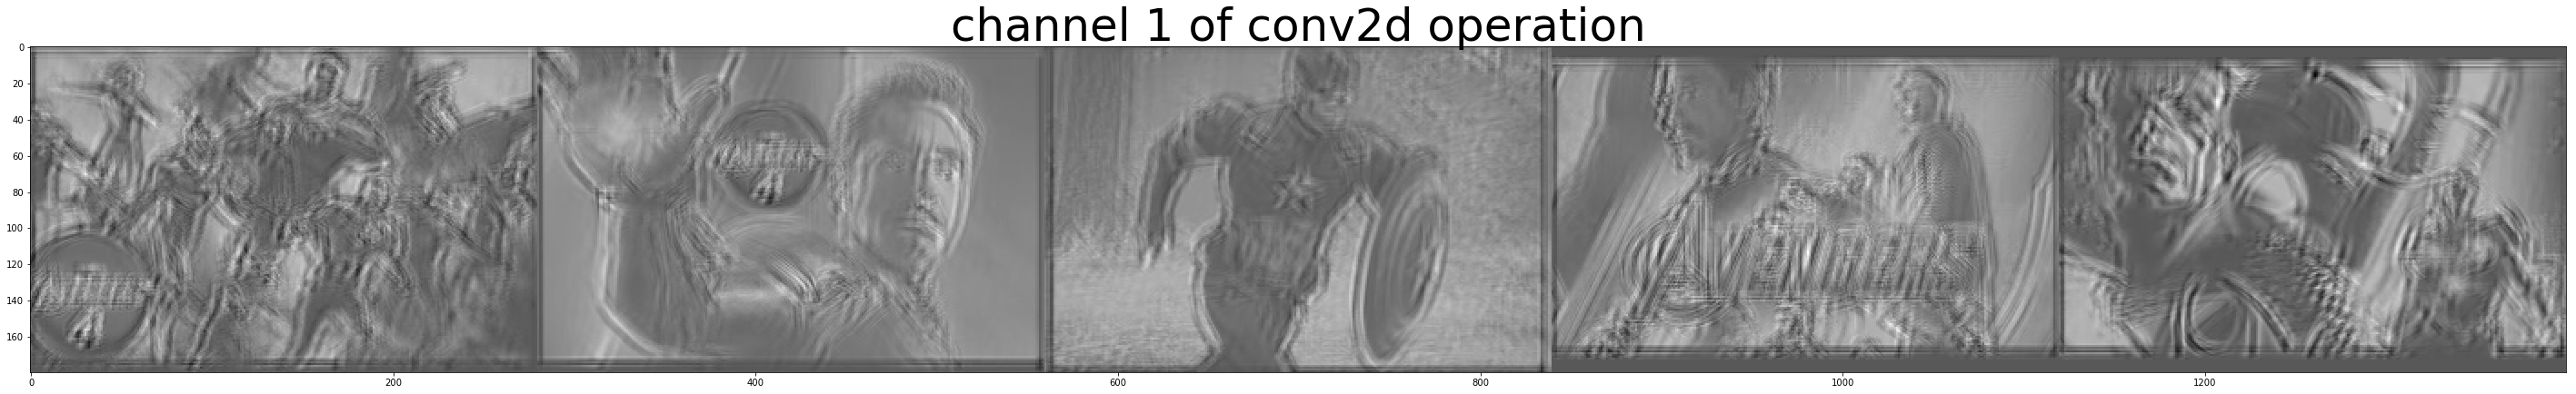

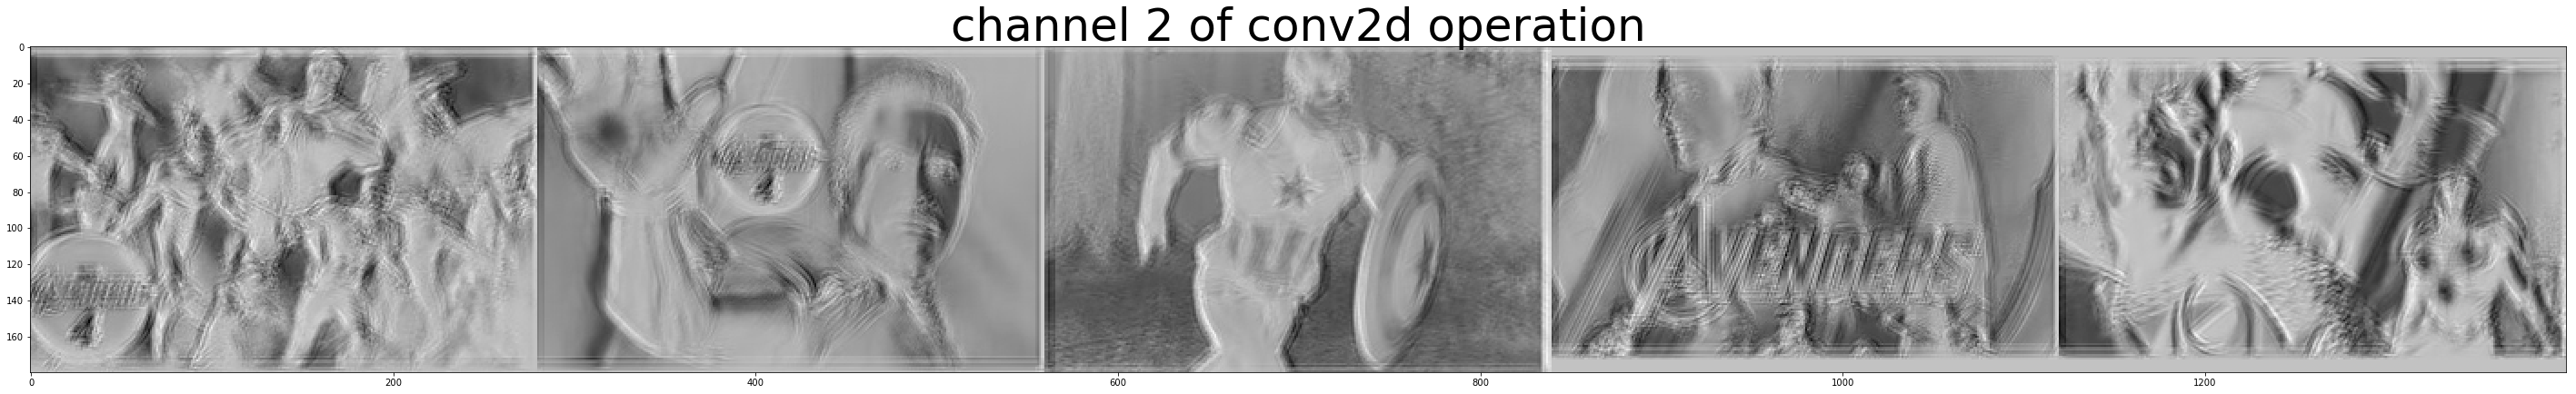

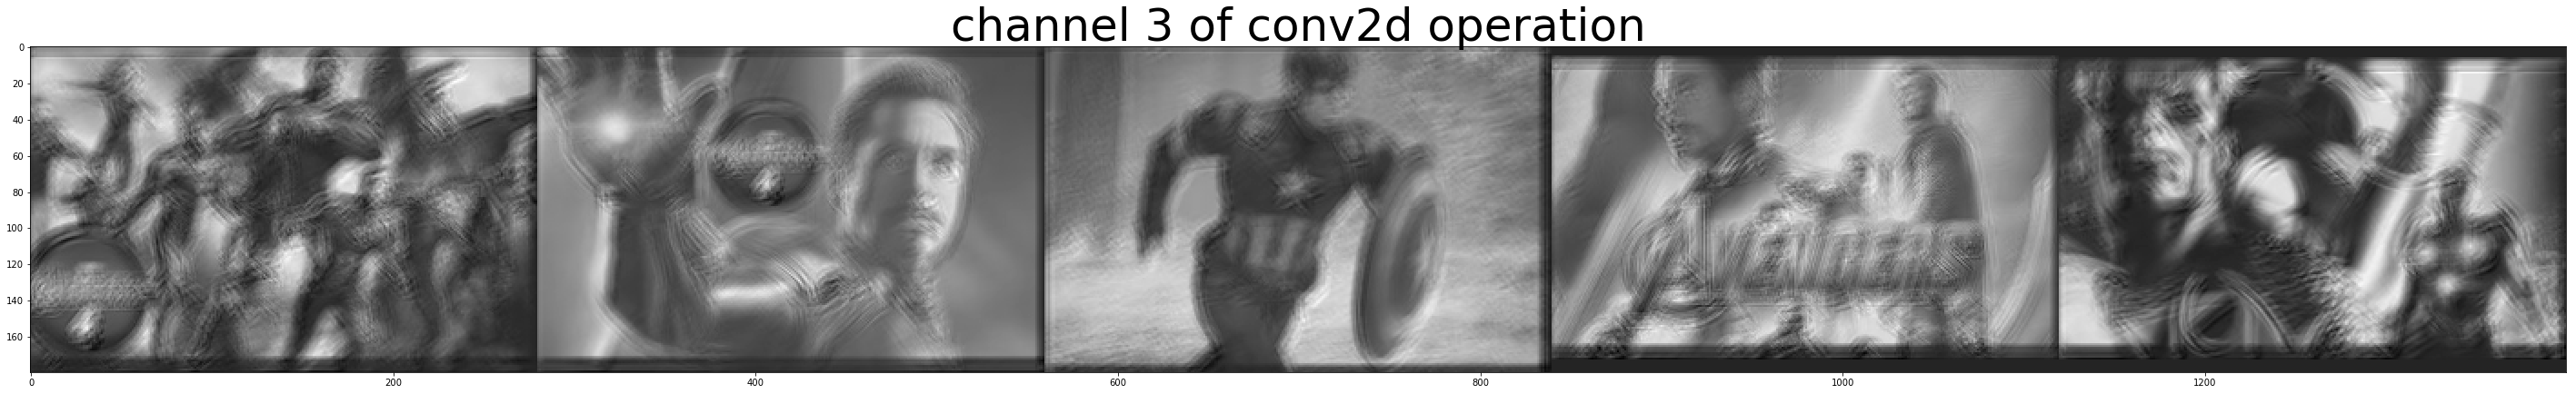

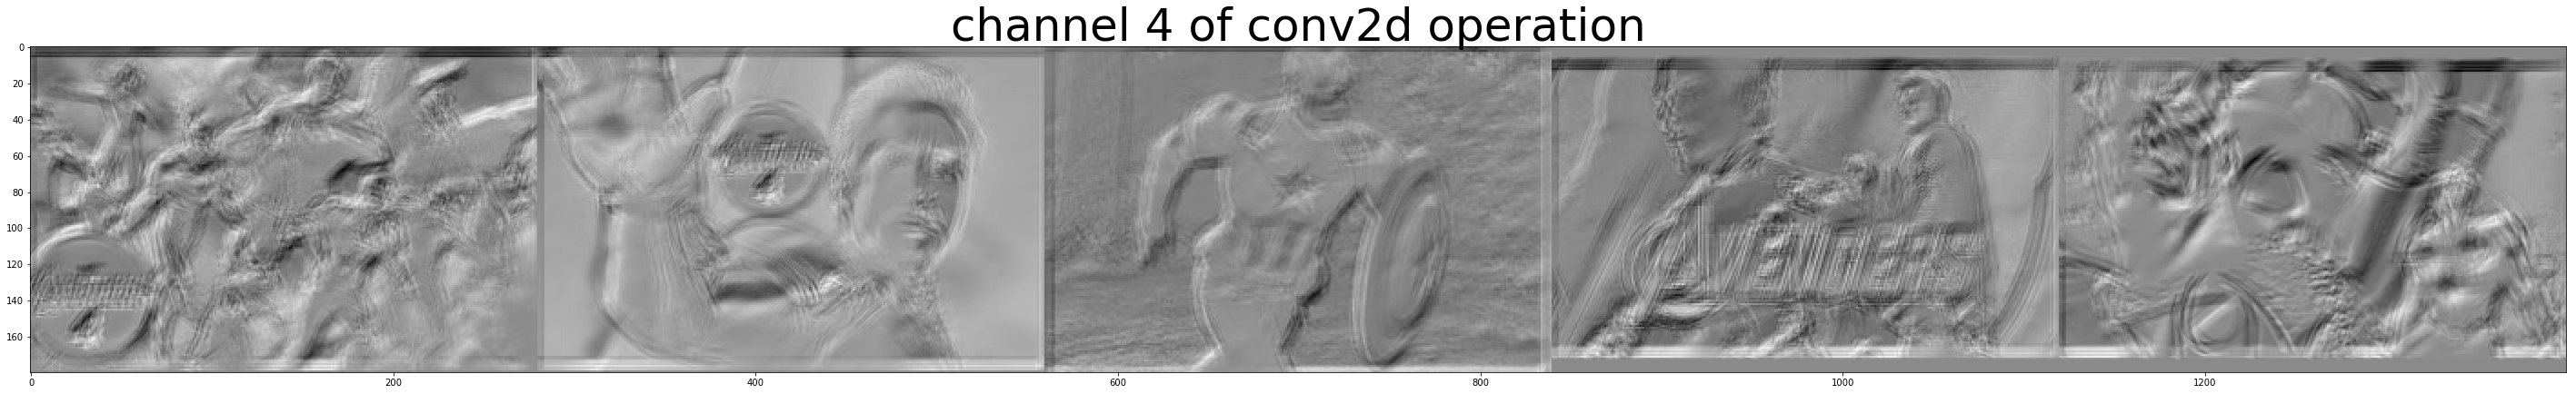

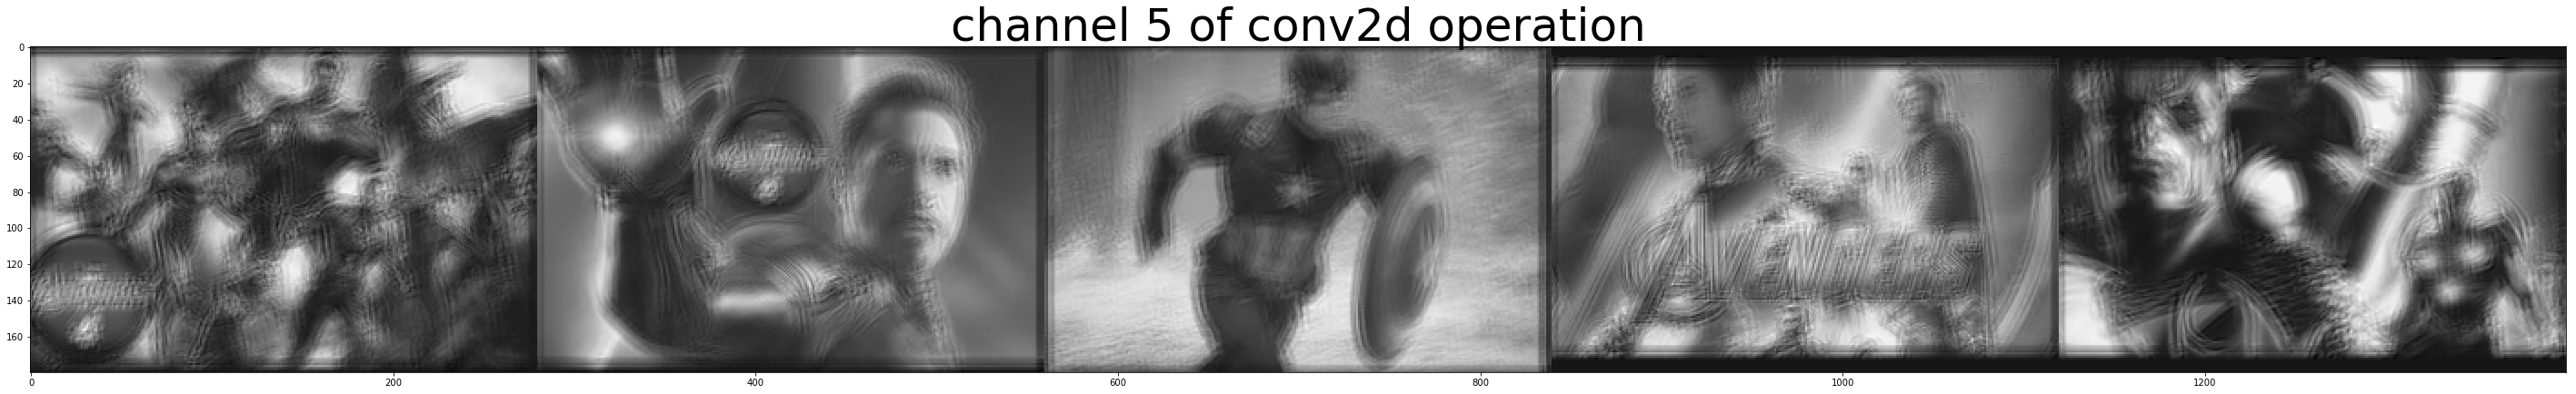

In [96]:
conv2d_same_pad_img_grid = make_img_grid(conv2d_same_pad, 1, 5, 180, 280, 5)
channels = 5
for i in range(channels):
    plt.figure(figsize=(50,50))    
    plt.subplot(channels,1,i+1)
    plt.imshow(conv2d_same_pad_img_grid.numpy()[0,:,:,i], cmap='gray')
    plt.title('channel {} of conv2d operation'.format(i+1), fontsize=50)
plt.show()

### 1.2 Conv2D with multi-pixel strides

In [98]:
# apply con2d operation with large strides
for img in dataset:
    # convolution operation
    conv2d_same_pad  = tf.layers.conv2d(inputs=img, filters=5, kernel_size=4, strides=(5,5), padding='same')    
    conv2d_valid_pad = tf.layers.conv2d(inputs=img, filters=5, kernel_size=4, strides=(5,5), padding='valid')
    
# observe the resulting tensor shape after the conv2d operation
print('original image shape: ', img.shape)
print('conv2d shape with same padding:', conv2d_same_pad.shape)
print('conv2d shape with valid padding: ', conv2d_valid_pad.shape)

original image shape:  (5, 180, 280, 3)
conv2d shape with same padding: (5, 36, 56, 5)
conv2d shape with valid padding:  (5, 36, 56, 5)


From the images below, we can see the intuitive effect of applying larger strides for the convolution operation.

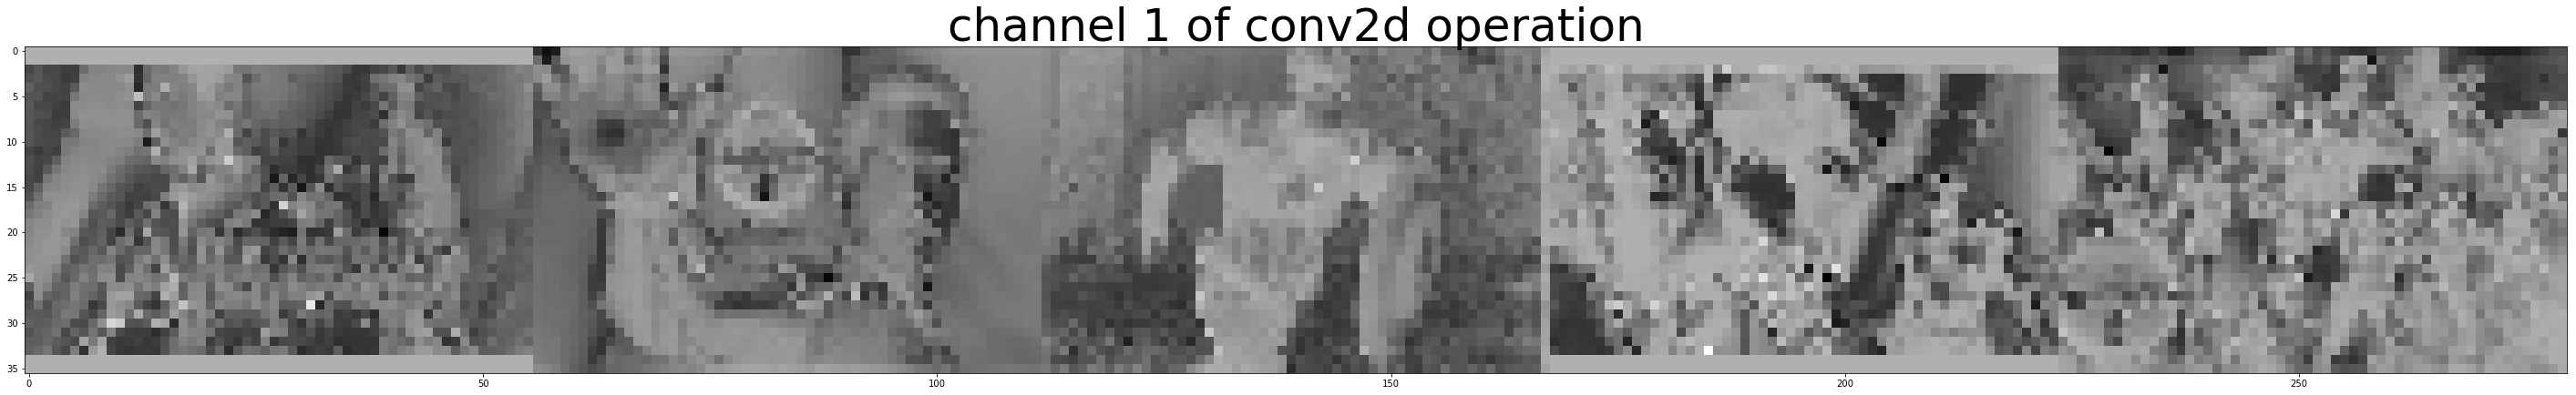

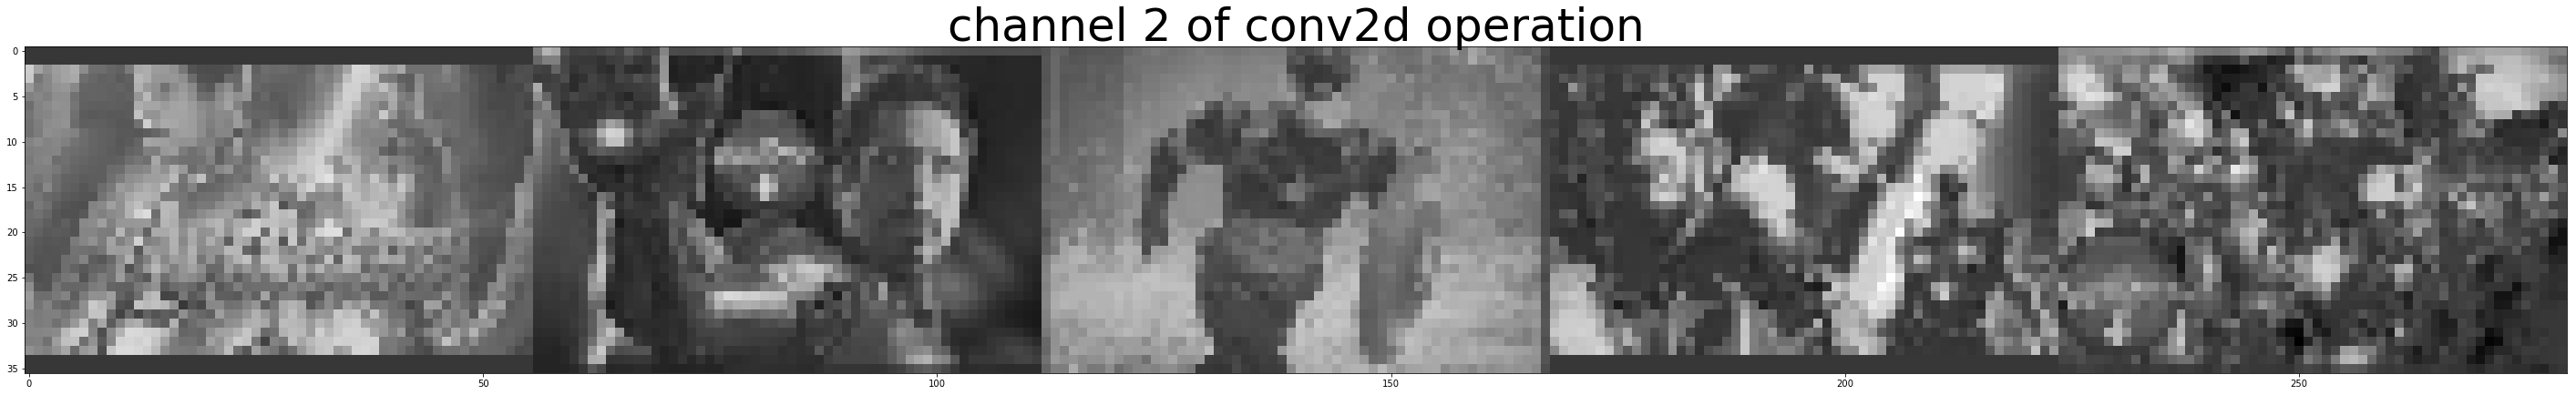

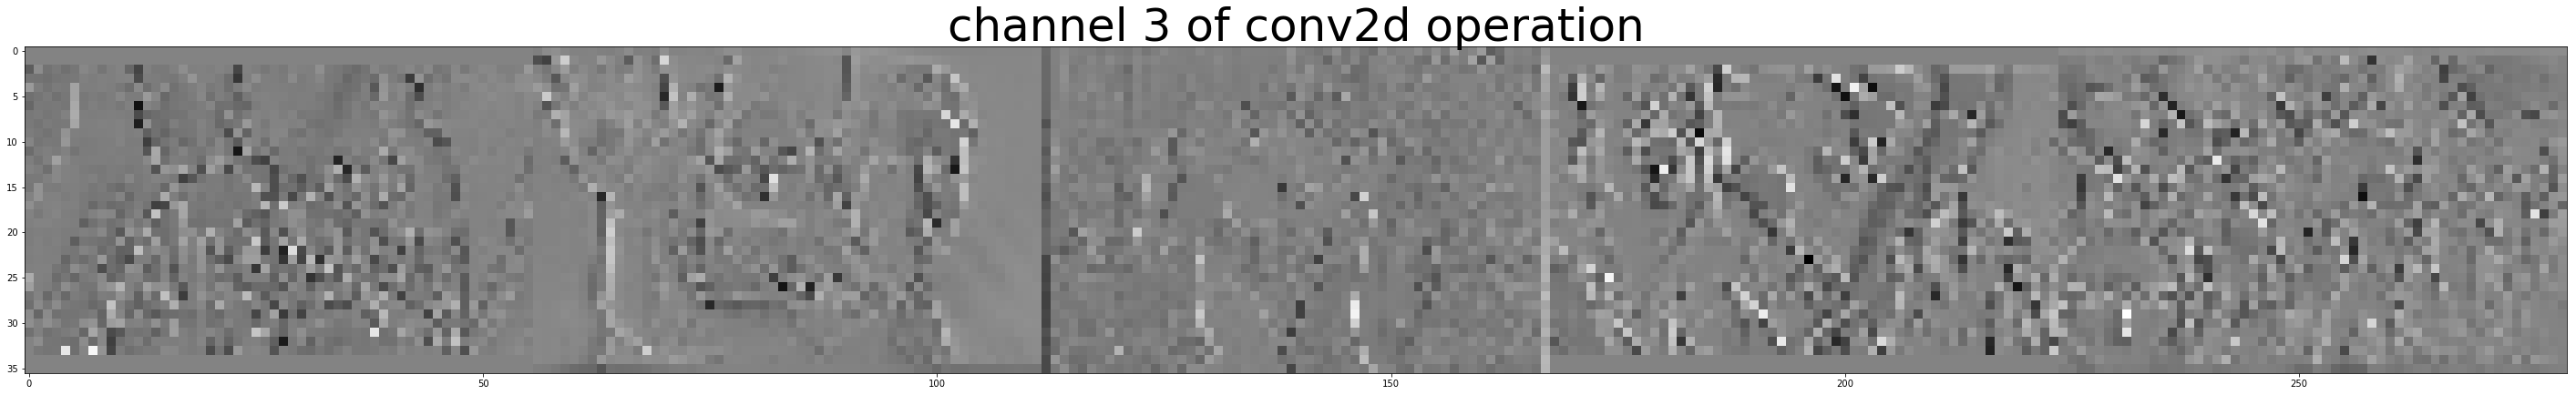

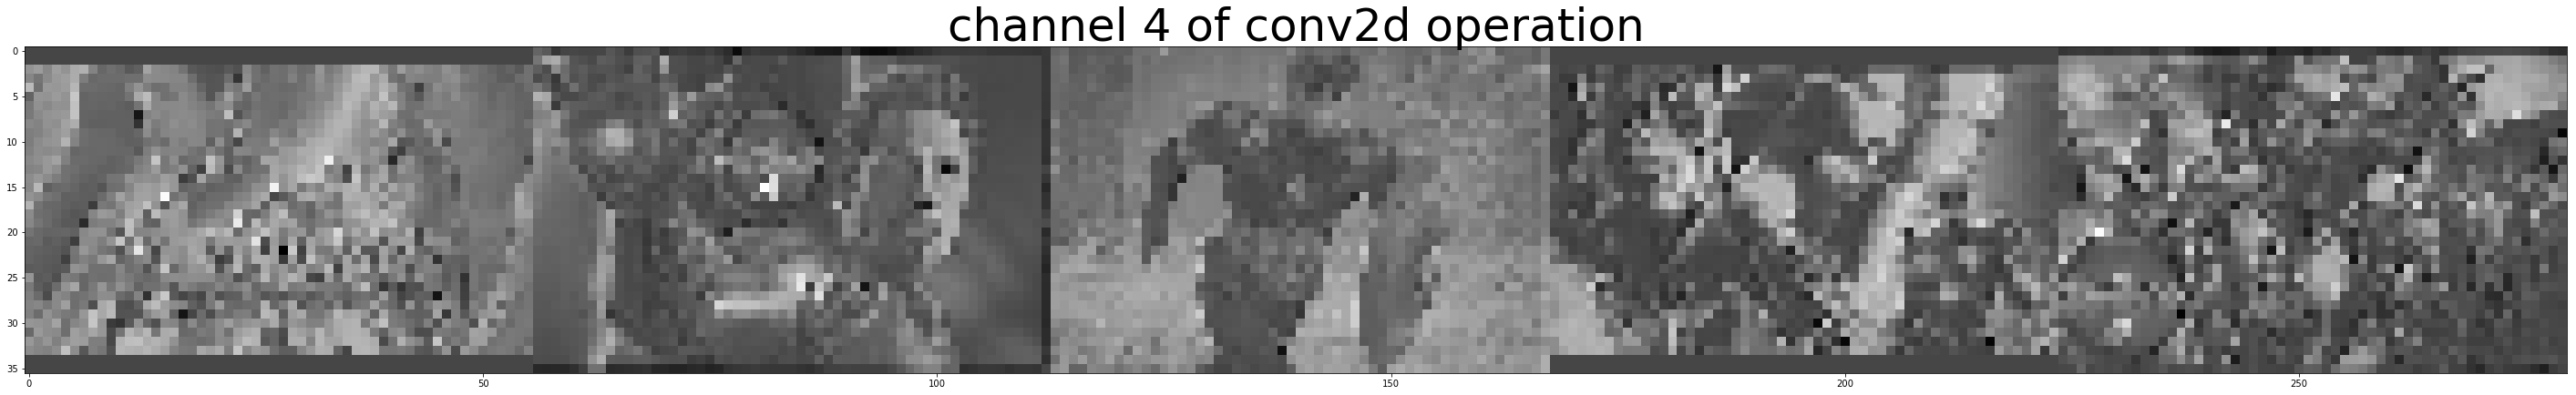

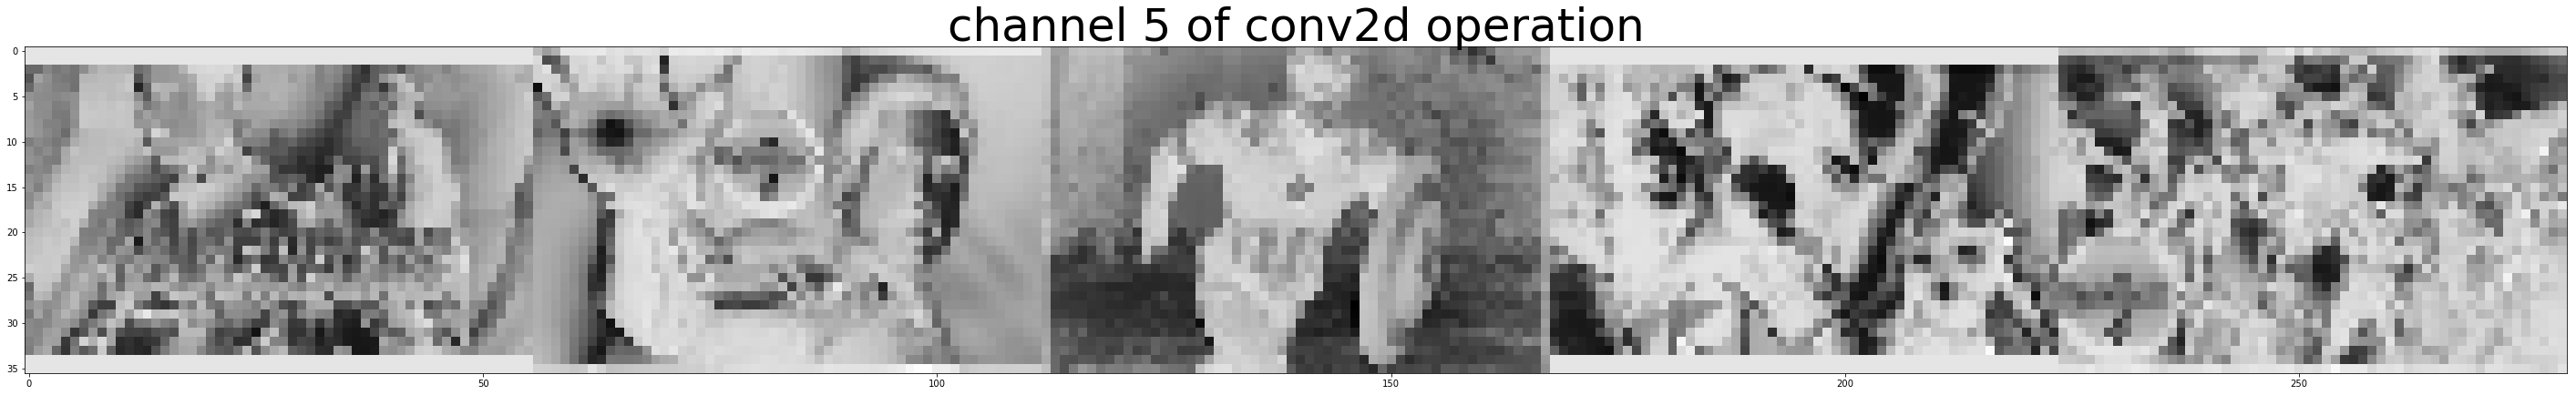

In [99]:
conv2d_same_pad_img_grid = make_img_grid(conv2d_same_pad, 1, 5, 36, 56, 5)
channels = 5
for i in range(channels):
    plt.figure(figsize=(50,50))
    plt.subplot(channels,1,i+1)
    plt.imshow(conv2d_same_pad_img_grid.numpy()[0,:,:,i], cmap='gray')
    plt.title('channel {} of conv2d operation'.format(i+1), fontsize=50)
plt.show()

From the above, a larger stride size results in convolution images **with much coarser quality**. This is to be expected since there is a greater degree of dis-continuity introduced (due to greater number of skipped pixels per stride) with larger strides. Note this operation is similar to down-sampling from an image.

### 1.3 Conv2D with larger kernel sizes

In [100]:
# apply con2d operation with large strides
for img in dataset:
    # convolution operation
    conv2d_same_pad  = tf.layers.conv2d(inputs=img, filters=5, kernel_size=10, strides=(1,1), padding='same')    
    conv2d_valid_pad = tf.layers.conv2d(inputs=img, filters=5, kernel_size=10, strides=(1,1), padding='valid')
        
# observe the resulting tensor shape after the conv2d operation
print('original image shape: ', img.shape)
print('conv2d shape with same padding:', conv2d_same_pad.shape)
print('conv2d shape with valid padding: ', conv2d_valid_pad.shape)

original image shape:  (5, 180, 280, 3)
conv2d shape with same padding: (5, 180, 280, 5)
conv2d shape with valid padding:  (5, 171, 271, 5)


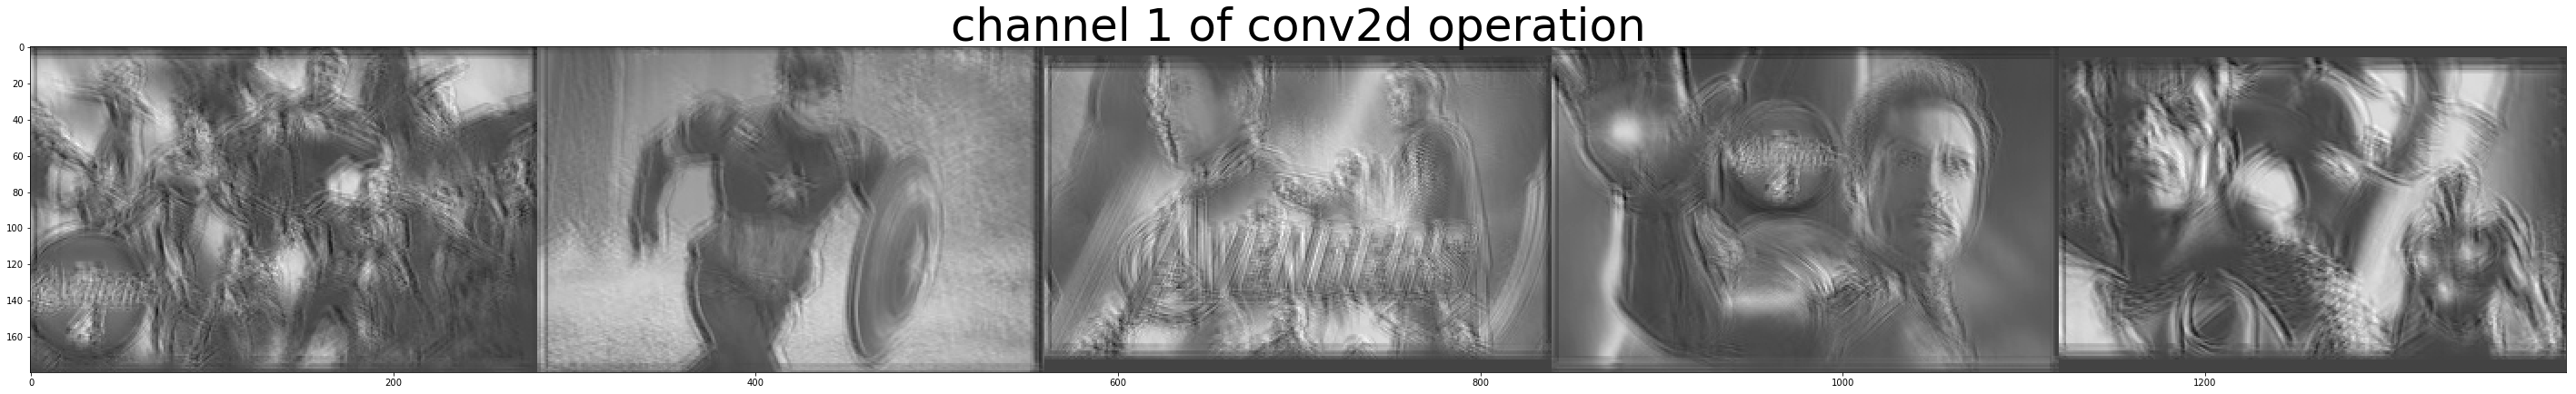

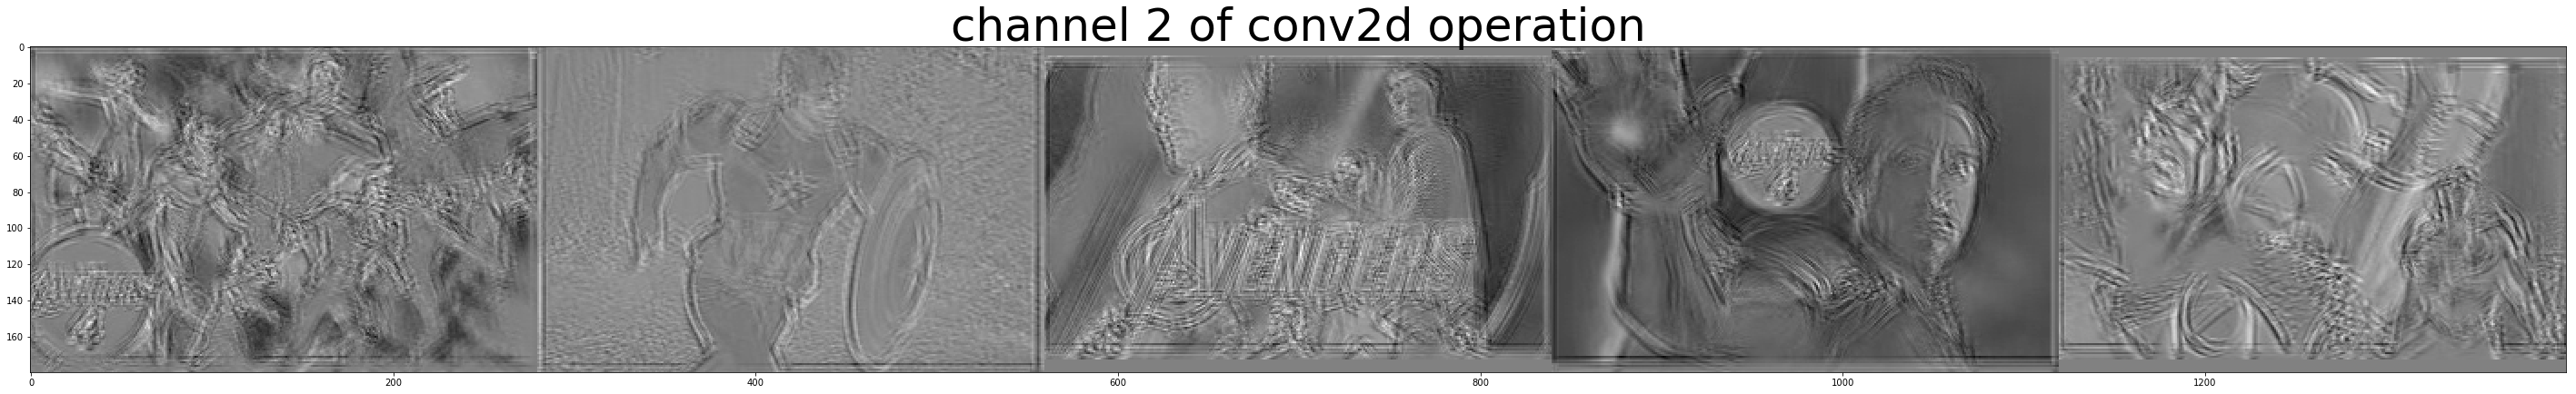

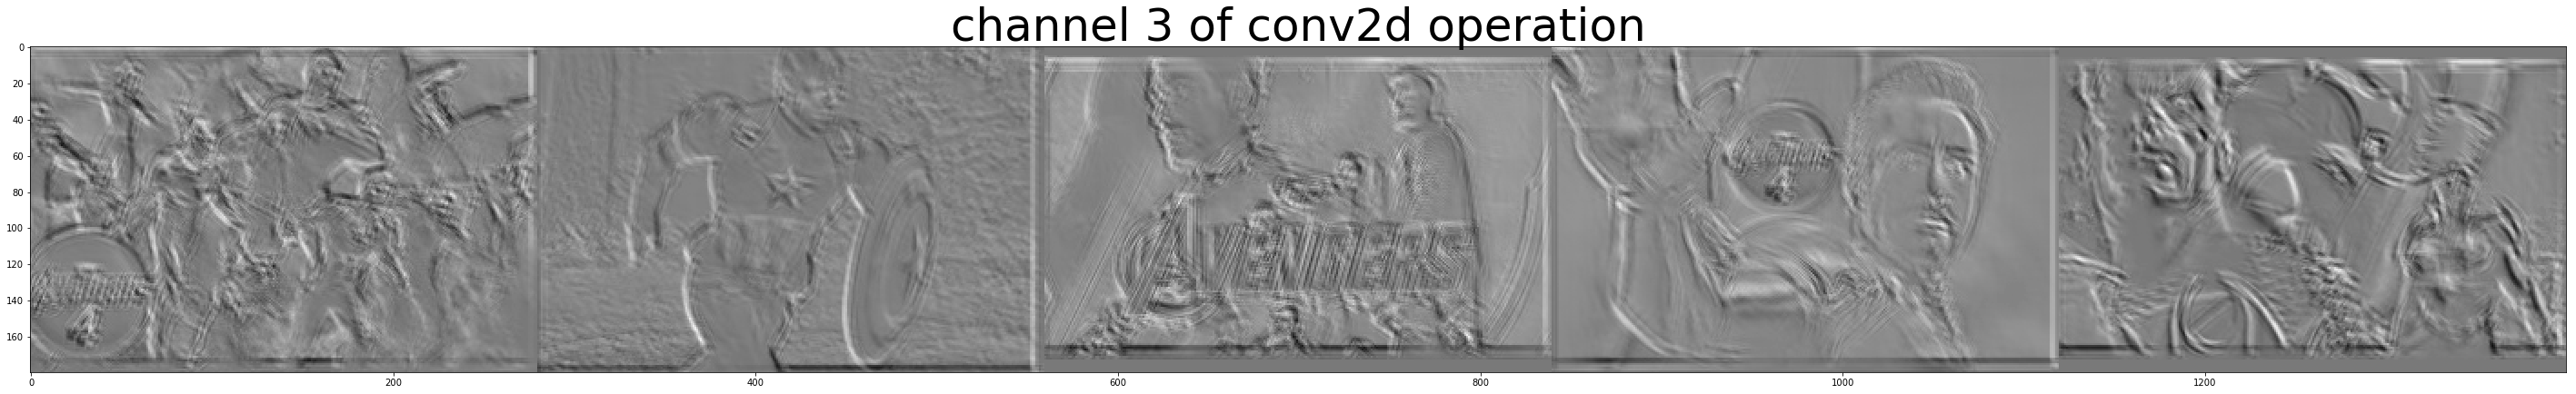

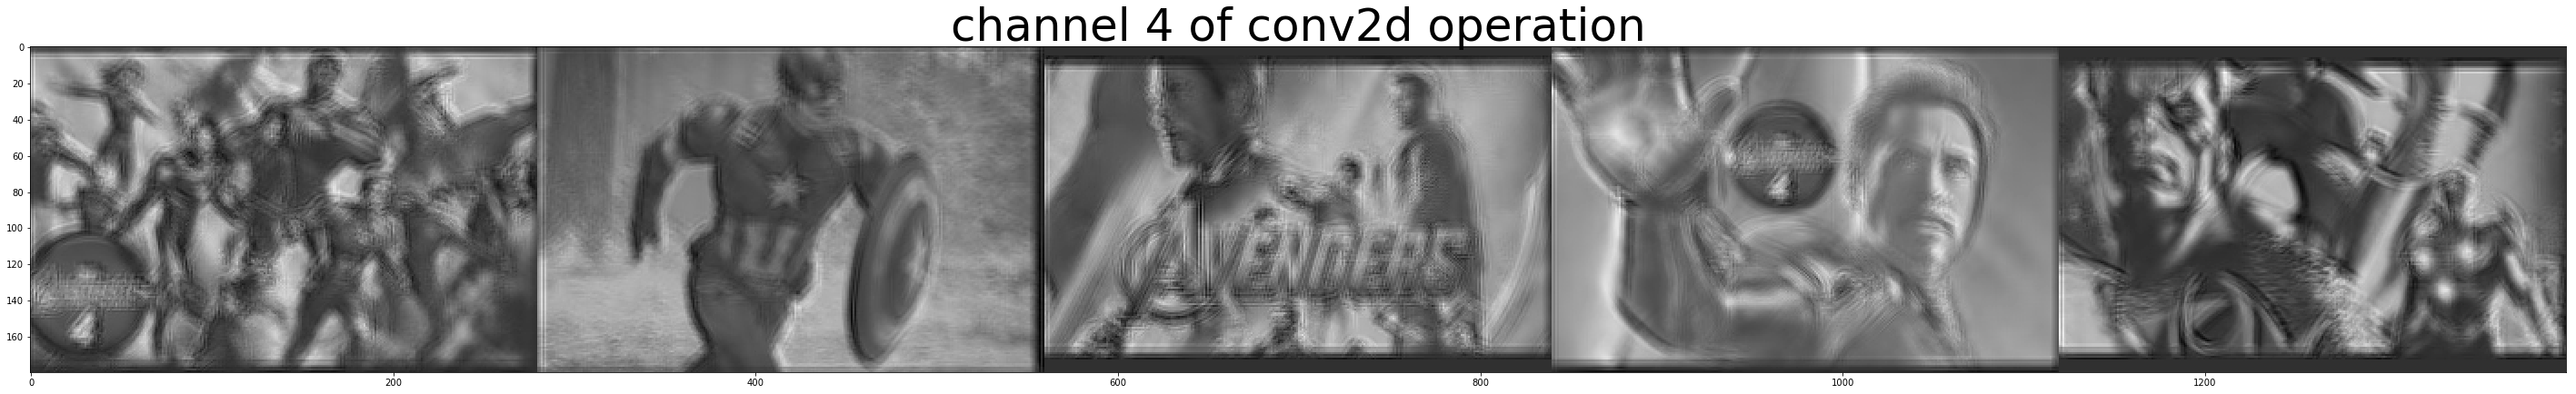

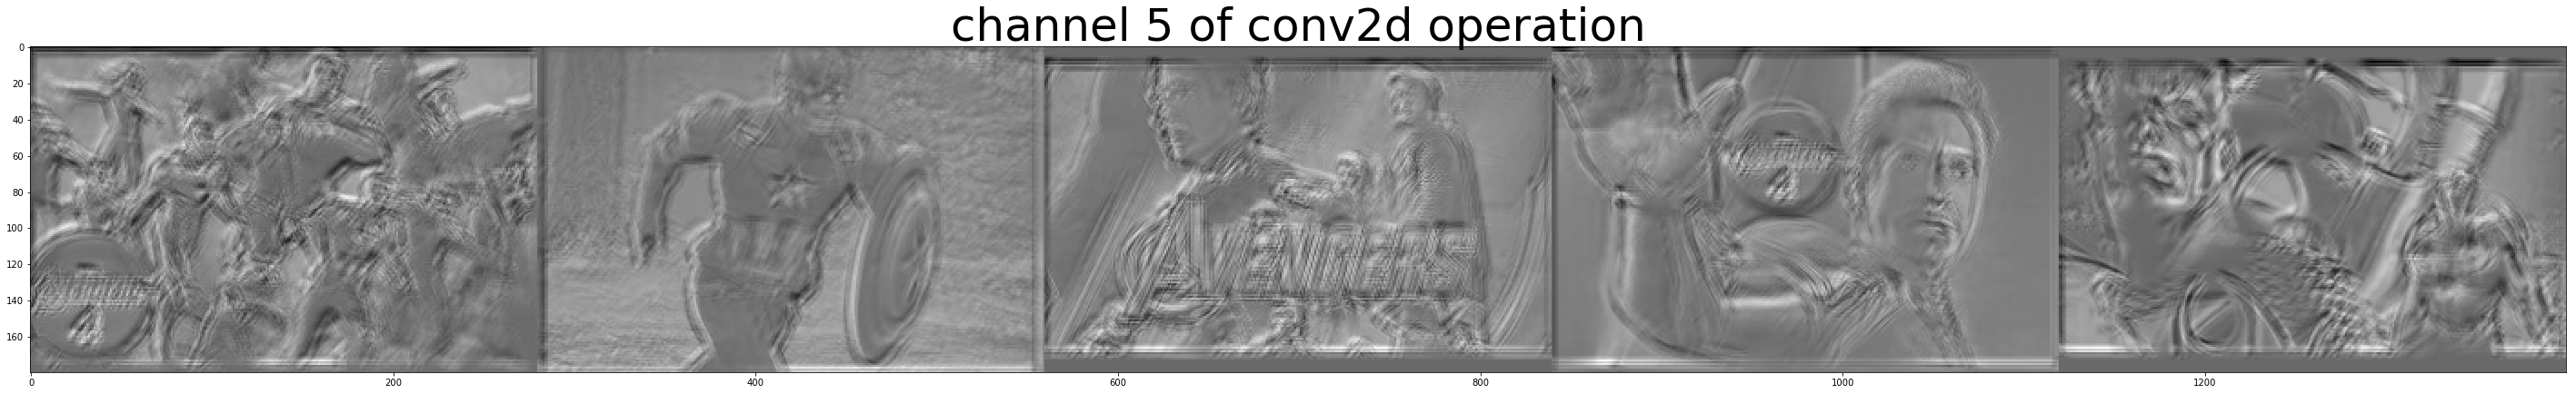

In [101]:
conv2d_same_pad_img_grid = make_img_grid(conv2d_same_pad, 1, 5, 180, 280, 5)
channels = 5
for i in range(channels):
    plt.figure(figsize=(50,50))
    plt.subplot(channels,1,i+1)
    plt.imshow(conv2d_same_pad_img_grid.numpy()[0,:,:,i], cmap='gray')
    plt.title('channel {} of conv2d operation'.format(i+1), fontsize=50)
plt.show()

The images above illustrate the effect of applying a convolution with a larger kernel size. The **resultant images become much more blurred** - the intuition behind this is that each kernel outout is produced from a much greater sub-region of the image, hence the signal from each of the original pixel becomes diluted.